# <center>Study of the Efficacy of Different Anti-Cancer Treatments</center>
In a recent animal study, 249 mice with squamous cell carcinoma (SCC) tumors were treated with various drug regimens, including Capomulin. Over a 45-day period, the study aimed to assess the efficacy of these treatments in inhibiting tumor development. The task involves analyzing the complete dataset and generating tables and figures for the technical report. The study's top-level summary is pending detailed analysis, but it aims to compare the performance of Capomulin against other regimens, considering factors such as tumor size reduction, survival rates, and potential side effects. The ultimate goal is to provide the executive team with a comprehensive overview of the study results to inform future directions in anti-cancer medication development.

## Data Cleaning

In [172]:
# Import dependencies

import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [145]:
# Read the mouse CSV file and print the first five rows

mouse_df = pd.read_csv('data\Mouse_metadata.csv')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [146]:
# Read the study CSV file and print the first five rows

study_df = pd.read_csv('data\Study_results.csv')
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [147]:
# Merge the two DataFrames on the 'Mouse ID' column and print the first 15 rows

merged_df = pd.merge(mouse_df, study_df, on = 'Mouse ID', how = 'left')
merged_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [148]:
# Investigate the merged DataFrame and check for any null values

merged_df.info()
print('There are no null values in the merged DataFrame')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB
There are no null values in the merged DataFrame


In [149]:
# Investigate the descriptive statistics for the numerical columns

merged_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [150]:
# Investigate the shape of the DataFrame

shape = merged_df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the DataFrame.')

There are 1893 rows and 8 columns in the DataFrame.


In [151]:
# Find the total number of mice used in the study

mouse_count = merged_df['Mouse ID'].nunique()
print(f'There are a total of {mouse_count} mice in the sample.')

There are a total of 249 mice in the sample.


In [152]:
# Find any duplicates in trials and delete the corresponding specimen as bad samples

duplicates = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])
merged_df.loc[duplicates, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [153]:
# Mouse ID g989 has duplicate trials. Therefore, we will delete the specimen as bad samples

merged_df = merged_df.loc[merged_df['Mouse ID'] != 'g989']
mouse_count = merged_df['Mouse ID'].nunique()
print(f'There are now a total of {mouse_count} mice in the sample after dropping bad samples.')

There are now a total of 248 mice in the sample after dropping bad samples.


In [154]:
# Rename Columns

merged_df = merged_df.rename(columns={'Age_months':'Age (Months)', 'Timepoint':'Timepoint (Days)'})
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint (Days),Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [155]:
# Create a DataFrame to summarize Drug Regimen vs. Tumor Volume (mm3)

group = merged_df.groupby('Drug Regimen')
t_mean = group['Tumor Volume (mm3)'].mean()
t_median = group['Tumor Volume (mm3)'].median()
t_variance = group['Tumor Volume (mm3)'].var()
t_stdev = group['Tumor Volume (mm3)'].std()
t_sem = group['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume (mm3)':t_mean, 'Median Tumor Volume (mm3)':t_median, 
                           'Variance Tumor Volume':t_variance, 'Standard Deviation Tumor Volume':t_stdev, 
                           'Standard Error of the Mean':t_sem})
summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Capomulin and Ramicane emerge as the most effective in diminishing tumor volume among the mice samples. The minimal variance in sizes under these two regimens, coupled with the smallest standard errors, suggests a heightened level of precision and consistency in their impact. This implies a more uniform and reliable response to treatment within these groups, reinforcing the notion that Capomulin and Ramicane showcase notable effectiveness in consistently reducing tumor sizes across the studied mice samples. These findings underscore the potential significance of these regimens for further exploration and potential clinical applications.

## Chart Observations

<IPython.core.display.Javascript object>


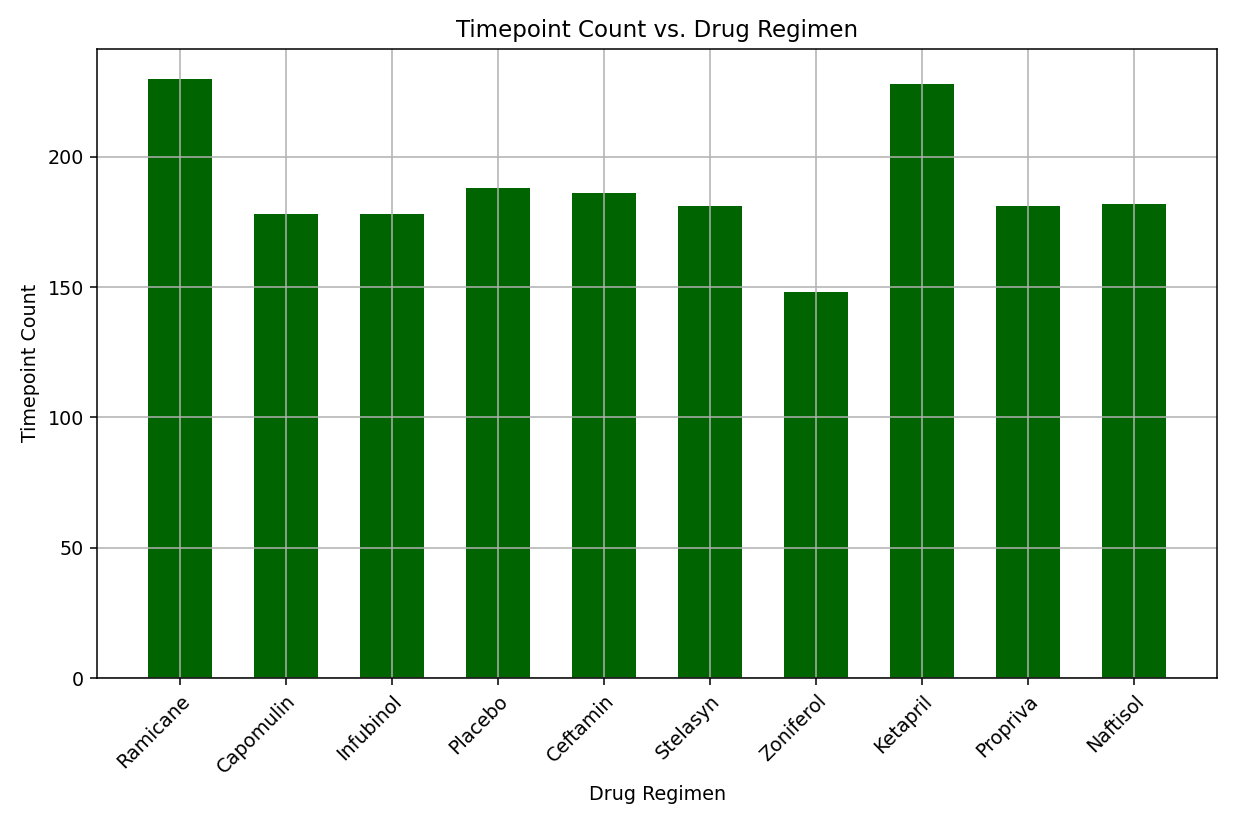

In [156]:
# A bar graph showing the total number of timepoints for all mice tested for each drug regimen using PyPlot

groupby_drug = merged_df.groupby('Drug Regimen')
bar_y = groupby_drug['Timepoint (Days)'].count()
bar_x = merged_df['Drug Regimen'].unique()

plt.figure(1, figsize=(9,6))

plt.bar(bar_x, bar_y, color='darkgreen', width=0.6)
plt.title('Timepoint Count vs. Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Count')
plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.grid()
plt.show()
plt.tight_layout()

The bar graph illustrates that the study has a greater number of timepoints allocated to the drug regimens 'Ramicane' and 'Ketapril,' while the regimen 'Zoniferol' has the fewest number of timepoints.

In [157]:
# A pie plot showing the distribution of sex using PyPlot

distribution_sex_df = merged_df[['Mouse ID', 'Sex']]
distribution_sex_df = distribution_sex_df.drop_duplicates('Mouse ID', keep='first')
mouse_sex = distribution_sex_df['Sex'].value_counts()
print(f'There are {mouse_sex[0]} male mice in the sample and {mouse_sex[1]} female mice in the sample.')

There are 125 male mice in the sample and 123 female mice in the sample.


<IPython.core.display.Javascript object>


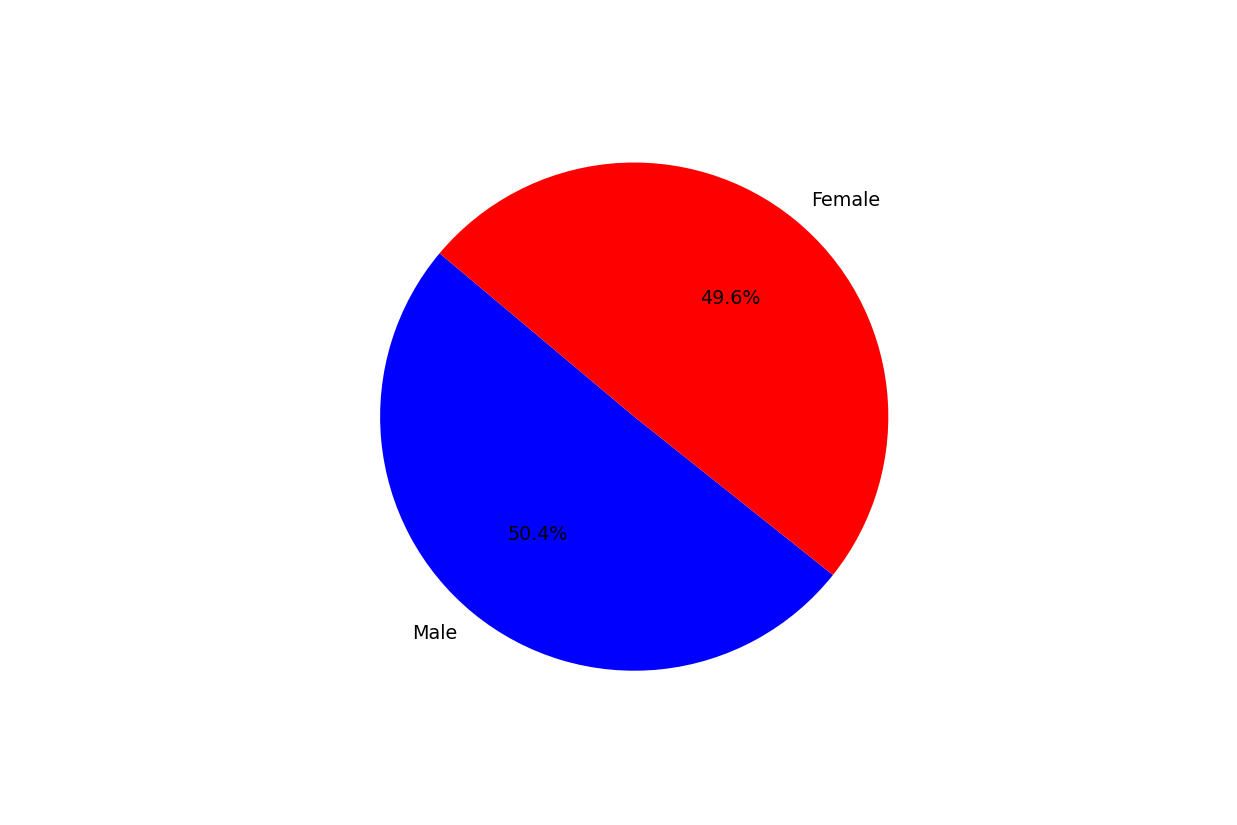

In [158]:
plt.figure(2, figsize=(9,6))
plt.pie([mouse_sex[0], mouse_sex[1]], explode=[0,0], labels=['Male', 'Female'], colors=['blue','red'],
        shadow=False, startangle=140, autopct='%1.1f%%')
plt.show()

The pie chart shows that we have a balanced distribution of male and female mice samples. This could imply that the researchers researchers aimed to minimize the impact of sex-related variables, making it easier to attribute observed effects to the treatments rather than potential gender biases. It's worth noting that such considerations in experimental design are essential for robust and reliable scientific findings, as they help control for potential confounding factors and enhance the generalizability of the results.

<IPython.core.display.Javascript object>


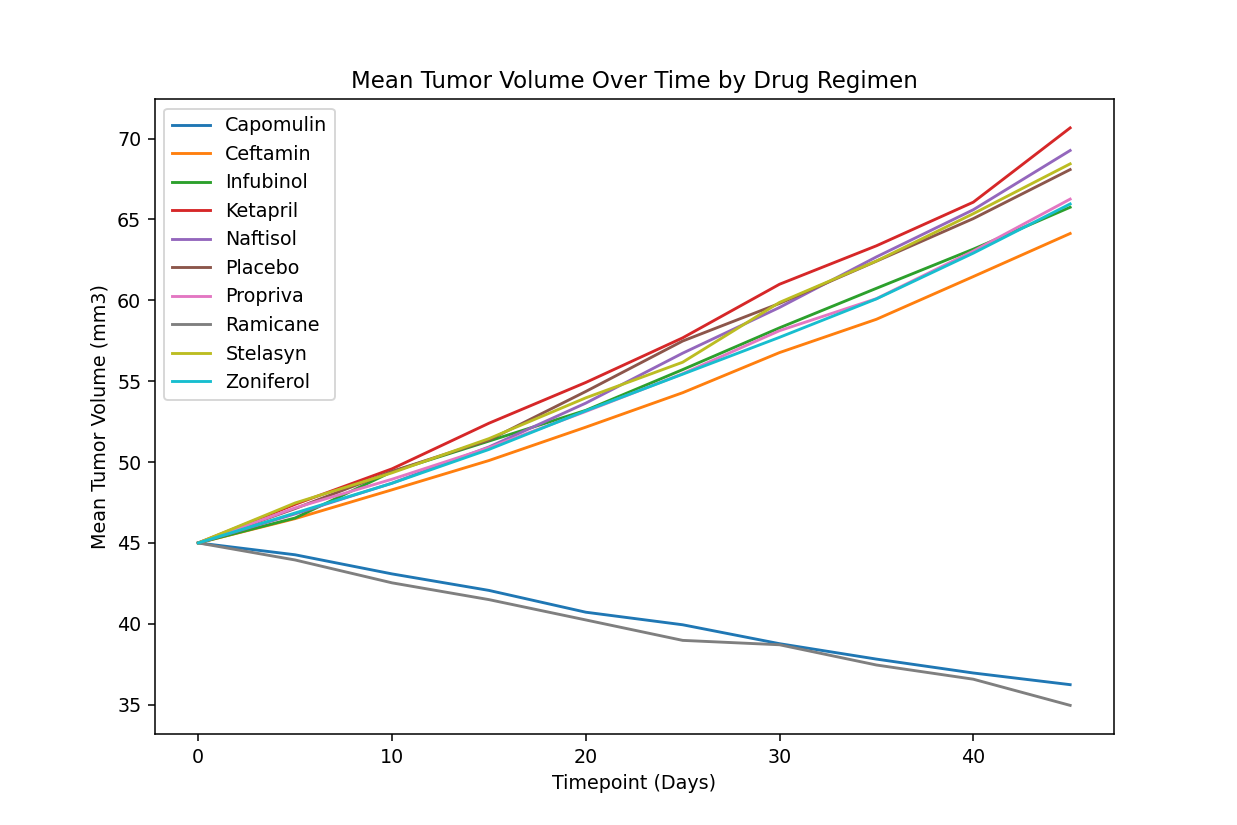

In [159]:
# A line graph showing the mean tumor volume across the timepoints for each drug regimen

grouped = merged_df.groupby(['Drug Regimen', 'Timepoint (Days)'])
mean_tumor_volume = grouped['Tumor Volume (mm3)'].mean().reset_index()

plt.figure(3, figsize=(9, 6))
for regimen in mean_tumor_volume['Drug Regimen'].unique():
    regimen_data = mean_tumor_volume[mean_tumor_volume['Drug Regimen'] == regimen]
    plt.plot(regimen_data['Timepoint (Days)'], regimen_data['Tumor Volume (mm3)'], label=regimen)

plt.title('Mean Tumor Volume Over Time by Drug Regimen')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.legend()
plt.show()

Only two drugs - Capomulin and Ramicane - shows efficacy in decreasing the tumor volume in the mice sample. All the other drugs do not appear to have any effect in decreasing the tumor volume.

# Quartiles, Outliers, and a Box Plot

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens by mean volume: 
Capomulin, Ramicane, Infubinol, and Ceftamin.
Then calculate the quartiles and IQR, and determine if there are any potential outliers across all four regimens.

In [160]:
# Add a column "Final Timepoint (Days)" to the existing DataFrame that filters for the four regimens

promising_regimens_df = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
promising_regimens_groupby = promising_regimens_df.groupby('Mouse ID')
promising_regimens_timepoint = promising_regimens_groupby['Timepoint (Days)'].max()
new_merge = pd.merge(promising_regimens_df, promising_regimens_timepoint, how='left', on='Mouse ID')

final_volume_df = new_merge.loc[new_merge['Timepoint (Days)_x'] == new_merge['Timepoint (Days)_y']]

final_volume_df = final_volume_df.rename(columns={'Timepoint (Days)_x':'Timepoint (Days)', 
                                     'Timepoint (Days)_y':'Final Timepoint (Days)'})
final_volume_df.reset_index(inplace=True)
final_volume_df.drop(columns=['index'], inplace=True)
final_volume_df

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint (Days),Tumor Volume (mm3),Metastatic Sites,Final Timepoint (Days)
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3,45
96,y163,Infubinol,Female,17,27,45,67.685569,3,45
97,y769,Ceftamin,Female,6,27,45,68.594745,4,45
98,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [161]:
# Print the samples' ID and their final tumor volume after going through treatment

mouse_id = final_volume_df['Mouse ID']
tumor_volume = final_volume_df['Tumor Volume (mm3)']

for i in range(final_volume_df.shape[0]):
    print(f'Mouse ID: {mouse_id[i]}, Final Tumor Volume: {round(tumor_volume[i],2)}mm3')

Mouse ID: k403, Final Tumor Volume: 22.05mm3
Mouse ID: s185, Final Tumor Volume: 23.34mm3
Mouse ID: x401, Final Tumor Volume: 28.48mm3
Mouse ID: m601, Final Tumor Volume: 28.43mm3
Mouse ID: g791, Final Tumor Volume: 29.13mm3
Mouse ID: s508, Final Tumor Volume: 30.28mm3
Mouse ID: f966, Final Tumor Volume: 30.49mm3
Mouse ID: m546, Final Tumor Volume: 30.56mm3
Mouse ID: z578, Final Tumor Volume: 30.64mm3
Mouse ID: j913, Final Tumor Volume: 31.56mm3
Mouse ID: u364, Final Tumor Volume: 31.02mm3
Mouse ID: n364, Final Tumor Volume: 31.1mm3
Mouse ID: y793, Final Tumor Volume: 31.9mm3
Mouse ID: r554, Final Tumor Volume: 32.38mm3
Mouse ID: m957, Final Tumor Volume: 33.33mm3
Mouse ID: c758, Final Tumor Volume: 33.4mm3
Mouse ID: t565, Final Tumor Volume: 34.46mm3
Mouse ID: a644, Final Tumor Volume: 32.98mm3
Mouse ID: i177, Final Tumor Volume: 33.56mm3
Mouse ID: j989, Final Tumor Volume: 36.13mm3
Mouse ID: i738, Final Tumor Volume: 37.31mm3
Mouse ID: a520, Final Tumor Volume: 38.81mm3
Mouse ID: w91

In [162]:
# Locate potential outliers for each of the four promising regimen:

drug_regimens = final_volume_df['Drug Regimen'].unique()

list_of_series_for_plotting = []
for drug_regimen in drug_regimens:
    each_regimen_df = final_volume_df[final_volume_df['Drug Regimen'] == drug_regimen][['Mouse ID','Tumor Volume (mm3)']]
    
    quartiles = each_regimen_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile-lower_quartile
    
    upper_whisker = upper_quartile+(1.5*iqr)
    lower_whisker = lower_quartile-(1.5*iqr)

    
    outlier_mice = each_regimen_df.loc[(each_regimen_df['Tumor Volume (mm3)']>upper_whisker) | (each_regimen_df['Tumor Volume (mm3)']<lower_whisker)]['Mouse ID'].values
    outlier_tumor_size = each_regimen_df.loc[(each_regimen_df['Tumor Volume (mm3)']>upper_whisker) | (each_regimen_df['Tumor Volume (mm3)']<lower_whisker)]['Tumor Volume (mm3)'].values
    
    print(f'Potential outlier mouse ID and its tumor size for {drug_regimen}:')
    print(f'Mouse ID: {outlier_mice}, Tumor Size: {outlier_tumor_size}')
    
    list_of_series_for_plotting.append(each_regimen_df['Tumor Volume (mm3)'])    

Potential outlier mouse ID and its tumor size for Ramicane:
Mouse ID: [], Tumor Size: []
Potential outlier mouse ID and its tumor size for Capomulin:
Mouse ID: [], Tumor Size: []
Potential outlier mouse ID and its tumor size for Infubinol:
Mouse ID: ['c326'], Tumor Size: [36.3213458]
Potential outlier mouse ID and its tumor size for Ceftamin:
Mouse ID: [], Tumor Size: []


<IPython.core.display.Javascript object>


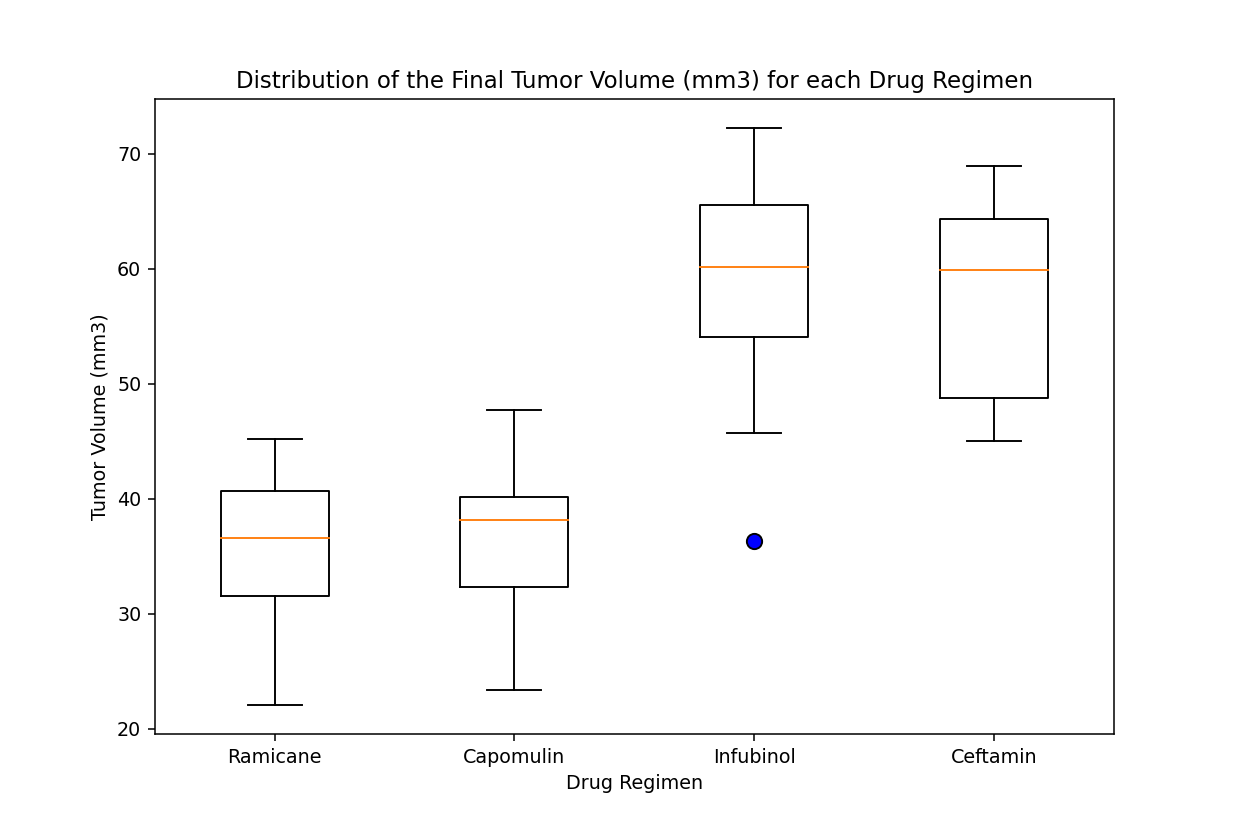

In [163]:
# Boxplot to locate outliers

plt.figure(4, figsize=(9,6))
plt.boxplot(list_of_series_for_plotting, flierprops={'marker':'o', 'markersize':8, 'markerfacecolor': 'blue'})
x_axis = np.arange(len(drug_regimens))+1
ticklocations = [value for value in x_axis]
labels = drug_regimens
plt.xticks(ticklocations, labels)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of the Final Tumor Volume (mm3) for each Drug Regimen')
plt.show()

There is one outlier under the drug regimen, Infubinol. This could imply several things including measurement error, biological variation, response heterogeneity, or drug resistance or ineffectivenes. Further investigation is required if the outlier raises concerns or questions about the validity of the data or the effectiveness of the drug regimen.

# A Deeper Look at the Capomulin Regimen

<IPython.core.display.Javascript object>


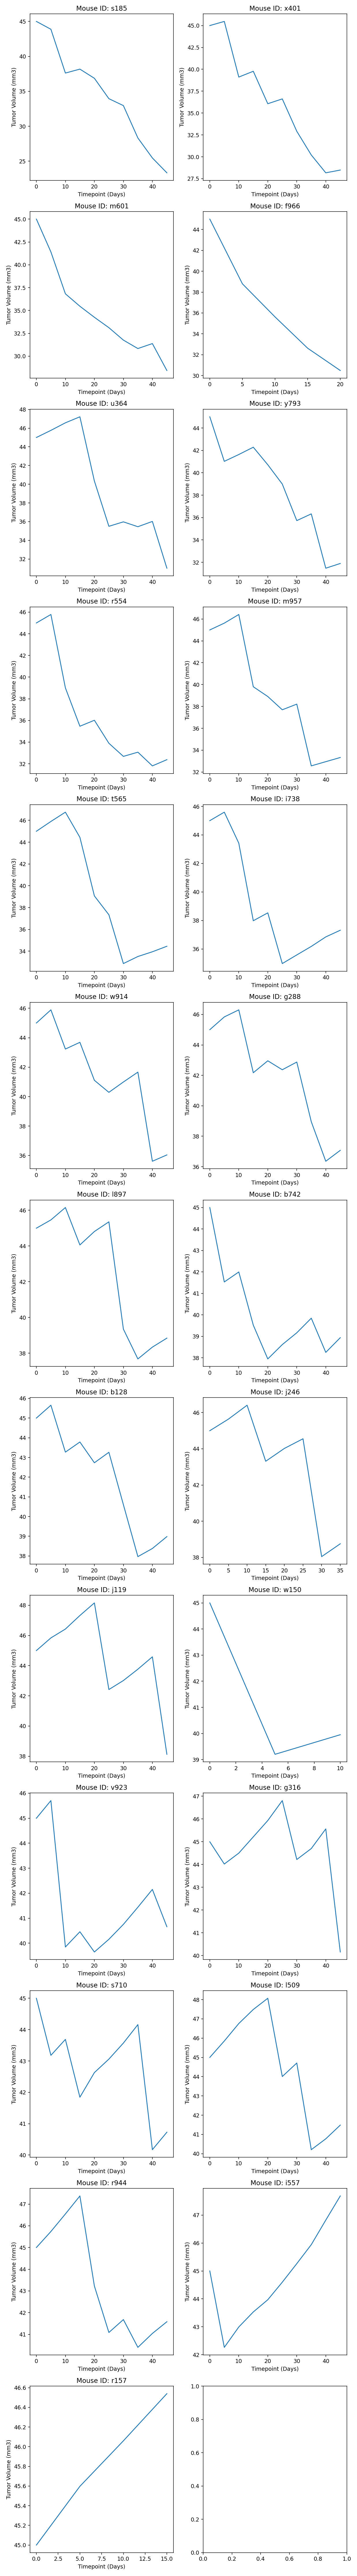

In [164]:
# Generate a line plot that shows the tumor volume vs. time point for four different samples treated with Capomulin

capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
unique_mice = capomulin_df['Mouse ID'].unique()

num_rows = len(unique_mice) // 2 + (len(unique_mice) % 2 > 0)
num_cols = min(2, len(unique_mice))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 5 * num_rows))
axes = axes.flatten()

for i, mouse_id in enumerate(unique_mice):
    mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]
    ax = axes[i]
    ax.plot(mouse_data['Timepoint (Days)'], mouse_data['Tumor Volume (mm3)'])
    ax.set_xlabel('Timepoint (Days)')
    ax.set_ylabel('Tumor Volume (mm3)')
    ax.set_title(f'Mouse ID: {mouse_id}')

plt.tight_layout()
plt.show()

With the exception of the sample labeled r157, all instances within the Capomulin treatment regimen demonstrate a reduction in tumor volume over time.

<IPython.core.display.Javascript object>


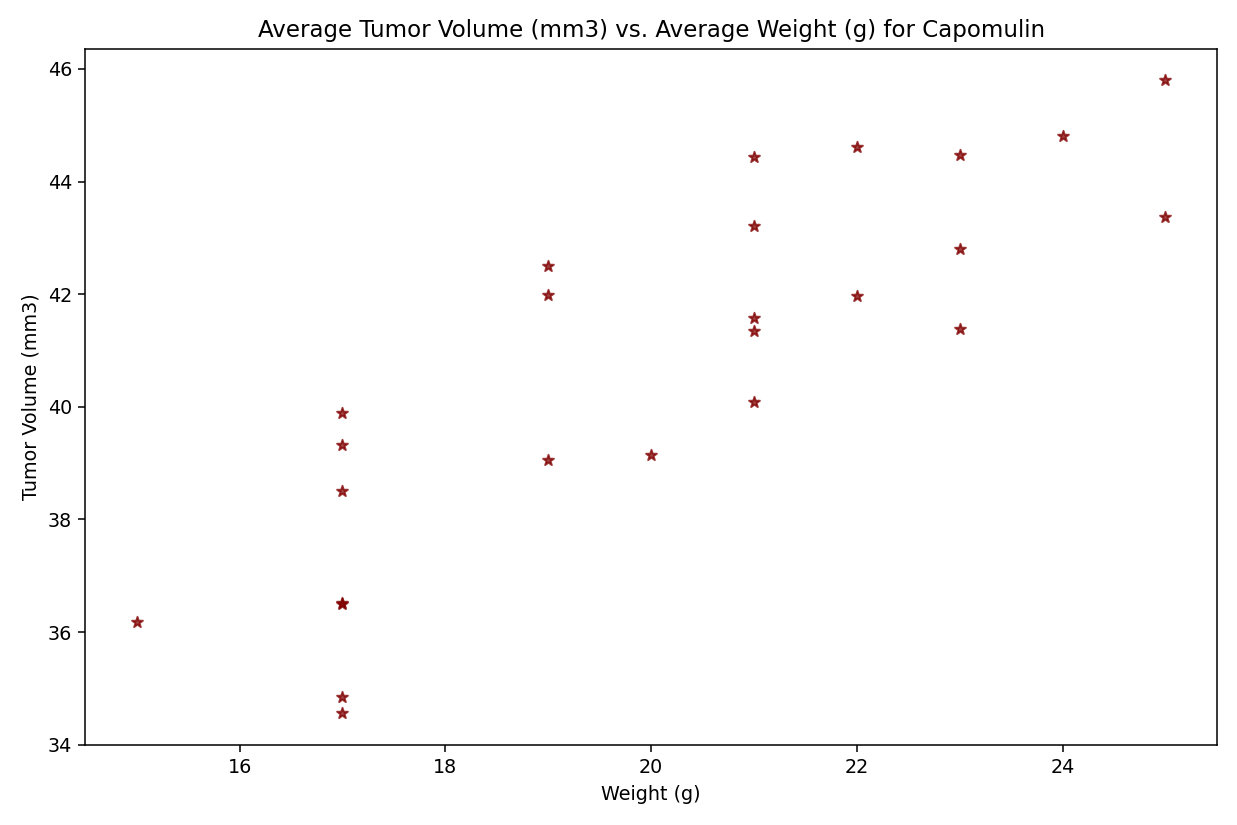

In [170]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen

cap_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
cap_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.figure(8, figsize=(9,6))
plt.scatter(cap_weight, cap_volume, marker = '*', color = 'maroon', alpha = 0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Average Weight (g) for Capomulin')
plt.tight_layout()
plt.show()

In [166]:
# Calculate the correlation coefficient and linear regression model for mouse weight vs. average tumor volume under Capomulin

corrcoeff = st.pearsonr(cap_weight, cap_volume)[0]
corrcoeff = round(corrcoeff, 2)
p_value = st.pearsonr(cap_weight, cap_volume)[1]
p_value = round(p_value, 2)
print(f'Correlation Coefficient: {corrcoeff}')
print(f'P-Value: {p_value}')
print(st.pearsonr(cap_weight, cap_volume))
print(f'The P-Value shows that the relationship is statistically significant.')

Correlation Coefficient: 0.84
P-Value: 0.0
(0.8419363424694719, 1.3225722434712586e-07)
The P-Value shows that the relationship is statistically significant.


<IPython.core.display.Javascript object>


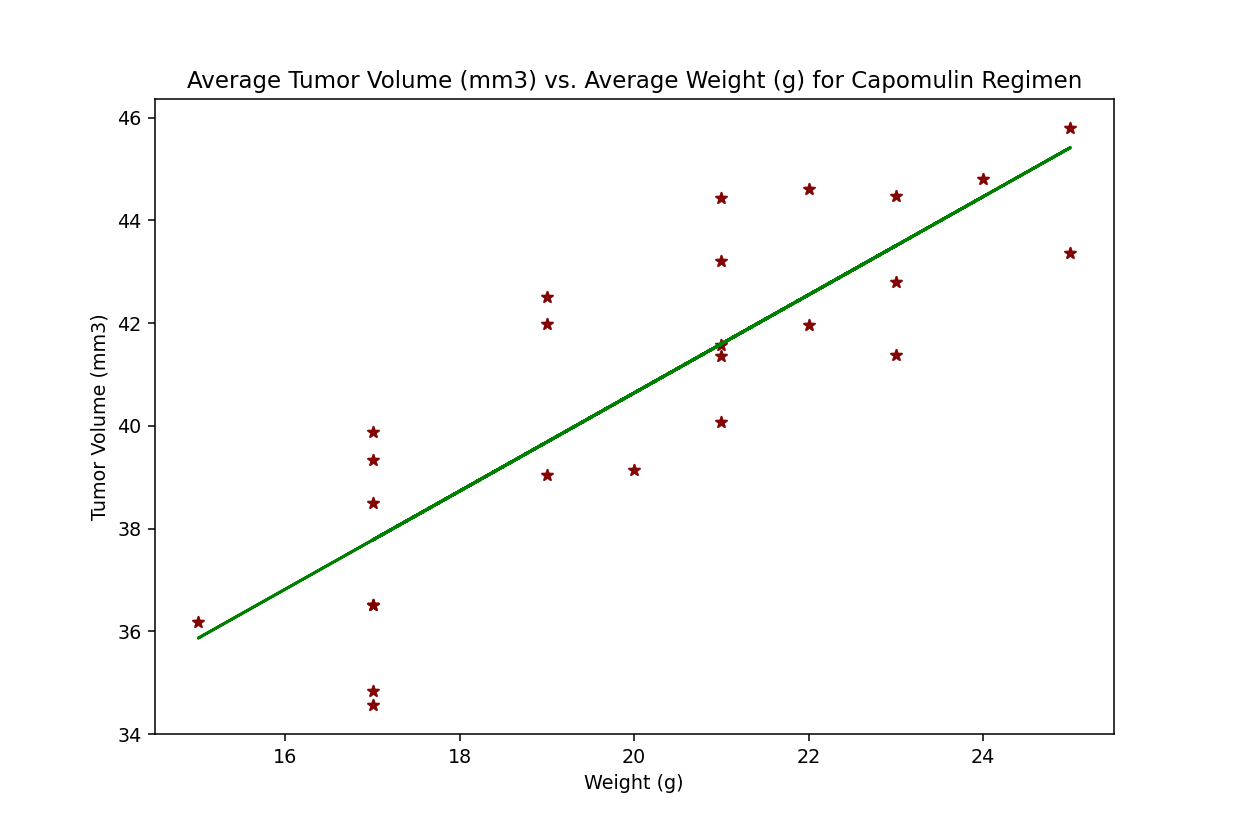

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)
The coefficient of determination, or R-Squared, is 0.7088568047708723


In [169]:
# Linear Regression:

plt.figure(9, figsize=(9,6))
plt.scatter(cap_weight, cap_volume, marker = '*', color = 'maroon', alpha = 0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Average Weight (g) for Capomulin Regimen')


(slope, intercept, r_val, p_val, SE) = st.linregress(cap_weight, cap_volume)
lin_regress_val = slope * cap_weight + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.scatter(cap_weight, cap_volume, marker = '*', color = 'maroon', alpha = 0.75)
plt.plot(cap_weight,lin_regress_val,"g-")

plt.show()
print(st.linregress(cap_weight, cap_volume))
print(f'The coefficient of determination, or R-Squared, is {r_val * r_val}')

# Analysis

- `Slope (Coefficient)`: The slope of the regression line is approximately 0.9544. This value indicates the change in tumor volume (dependent variable) for each unit increase in mouse weight (independent variable). In this case, as mouse weight increases, the tumor volume is expected to increase by approximately 0.9544 units.

- `Intercept`: The intercept of the regression line is approximately 21.5522. This is the value of the tumor volume when the mouse weight is zero. In practical terms, it might not have a meaningful interpretation in this context, as a mouse weight of zero is not meaningful in the context of this analysis.

- `Correlation Coefficient (rvalue)`: The correlation coefficient is approximately 0.8419. This value measures the strength and direction of the linear relationship between mouse weight and tumor volume. A positive value indicates a positive correlation, meaning that as mouse weight increases, tumor volume tends to increase.

- `P-Value`: The p-value is very small (1.322e-07), suggesting that the observed correlation is statistically significant. This means there is strong evidence to reject the null hypothesis that there is no correlation between mouse weight and tumor volume.

- `Standard Error (stderr)`: The standard error of the slope is approximately 0.1275. It represents the standard deviation of the sampling distribution of the slope. A lower standard error indicates more precision in estimating the slope.

- `Coefficient of Determination (R-Squared)`: The coefficient of determination, or R-Squared, is approximately 0.7089. This value represents the proportion of the variance in the dependent variable (tumor volume) that is predictable from the independent variable (mouse weight). An R-Squared of 0.7089 indicates that about 70.89% of the variability in tumor volume can be explained by the linear regression model using mouse weight.

In summary, the positive slope and high R-Squared suggest a strong positive linear relationship between mouse weight and tumor volume under the Capomulin regimen, meaning that as mouse weight increases, tumor volume is likely to increase, and the linear regression model is a statistically significant predictor of this relationship.